당뇨병은
roc_curve 임계치를 왼쪽으로 해서 recall을 높게 하는 것이 좋겠다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
di = pd.read_csv('./datasets/diabetes.csv')
di.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
di['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
y = di['Outcome']
X= di.drop('Outcome',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, \
                                                  test_size=0.2, random_state=156, stratify=y)

In [16]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

c:\Python 3.7.1\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [17]:
from sklearn.metrics \
    import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

In [18]:
def get_clf_eval(y_test,pred , pred_proba):
    confusion =confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision= precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    auc = roc_auc_score(y_test, pred_proba)

    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f} , f1Score:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall, f1score, auc))

In [19]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111 , f1Score:0.6804, AUC:0.8470


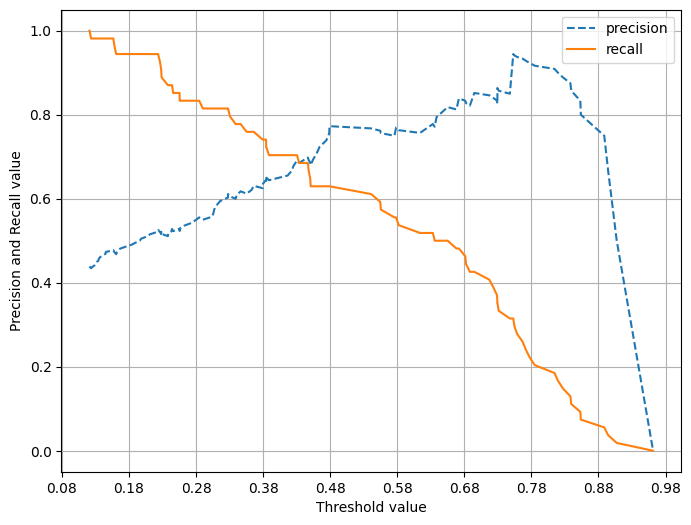

In [20]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, pred_proba)

In [21]:
di.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
len(di)

768

In [23]:
zero_features =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

total_count = len(di)

for feature in zero_features:
    zero_count = di[di[feature]==0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 퍼센트는 {100*zero_count/total_count:.2f} %')
    
for feature in zero_features:
    di[feature] = di[feature].replace(0, di[feature].mean())

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [24]:
for feature in zero_features:
    zero_count = di[di[feature]==0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 퍼센트는 {100*zero_count/total_count:.2f} %')

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [25]:
from sklearn.preprocessing import StandardScaler
y = di['Outcome']
X= di.drop('Outcome',axis=1)

scaler = StandardScaler()
scaler.fit(X)
iris_scaled = scaler.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, \
                                                  test_size=0.2, random_state=156, stratify=y)

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]                                                  

c:\Python 3.7.1\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111 , f1Score:0.6804, AUC:0.8470


## sklearn.preprocessing.Binarizer
* class sklearn.preprocessing.Binarizer(*, threshold=0.0, copy=True)


In [31]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_t in thresholds:
        binarizer = Binarizer(threshold=custom_t).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_t)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [34]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_eval_by_threshold(y_test, pred_proba.reshape(-1,1), thresholds)

임계값: 0.3
오차행렬
[[65 35]
 [10 44]]
정확도 : 0.7078, 정밀도 : 0.5570, 재현율 : 0.8148 , f1Score:0.6617, AUC:0.8470
임계값: 0.33
오차행렬
[[72 28]
 [11 43]]
정확도 : 0.7468, 정밀도 : 0.6056, 재현율 : 0.7963 , f1Score:0.6880, AUC:0.8470
임계값: 0.36
오차행렬
[[75 25]
 [13 41]]
정확도 : 0.7532, 정밀도 : 0.6212, 재현율 : 0.7593 , f1Score:0.6833, AUC:0.8470
임계값: 0.39
오차행렬
[[80 20]
 [16 38]]
정확도 : 0.7662, 정밀도 : 0.6552, 재현율 : 0.7037 , f1Score:0.6786, AUC:0.8470
임계값: 0.42
오차행렬
[[81 19]
 [16 38]]
정확도 : 0.7727, 정밀도 : 0.6667, 재현율 : 0.7037 , f1Score:0.6847, AUC:0.8470
임계값: 0.45
오차행렬
[[84 16]
 [19 35]]
정확도 : 0.7727, 정밀도 : 0.6863, 재현율 : 0.6481 , f1Score:0.6667, AUC:0.8470
임계값: 0.48
오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111 , f1Score:0.6804, AUC:0.8470
임계값: 0.5
오차행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도 : 0.7674, 재현율 : 0.6111 , f1Score:0.6804, AUC:0.8470
